In [5]:
################################################################################################
# Extracting chemical-disease associations from the biological literature
# R214: Main Practical
# Jan Ondras (jo356), Trinity College
################################################################################################
# Grounding of named entities to MESH concepts
# using Fuzzy approximate string matching (FASM)
################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import time
import glob
from fuzzywuzzy import process # https://github.com/seatgeek/fuzzywuzzy

# Set which partition to use for evaluation
dataset_type = 'train' # train, devel, or test
# dataset_type = 'devel'
dataset_type = 'test'

# Load tagged named entities, preserving sentence segmentation
NE = []
ii = 0
EOS_cnt = 0
with open('./bmip-2018-master/BC5-CDR/conll/' + dataset_type + '.tsv') as f:
    rl = f.readline()
    while rl != '':
        ii += 1
        rlwn = rl.split('\n')[0] # read line skipping the new line character
        
        # End of sentence
        if rlwn == '':
            NE.append([])
            #print ii, "EOS" # end of sentence
            EOS_cnt += 1
        # Beginning or within sentence
        else:           
            NE.append(rlwn.split('\t'))
            #print ii, NE[-1]
        rl = f.readline()
        
print len(NE), " items"
print EOS_cnt, " sentences"

# Load MESH concepts: <name, type (Chemical or Disease), code>
MESH = np.loadtxt('./../Dataset/CDR_MeSH.tsv', delimiter='\t', skiprows=0, dtype=str) 
MESHdict = {}
for r in MESH:
    MESHdict[r[0]] = r[1:]

129547  items
4797  sentences


In [6]:
################################################################################################
# Iterate over tagged concepts and find matches with MESH concepts
################################################################################################
st = time.time()
# cnt_matched = 0      # count matched concepts
# cnt_NOT_matched = 0  # count not-matched concepts

# all_AC = set()       # to count unique matched concepts
# matched_AC = set()   # to count unique matched concepts

matchings = [] # <predicted label, original string, matched string, matched label, matched code, score>
scores = []

i = 0
while i < len(NE):
    
    # End of sentence
    if NE[i] == []:
        i += 1
    
    # Beginning of chemical or disease concept
    elif NE[i][5][0] == 'B': # check tag beginning
        
        tmpStr = NE[i][0] # initialise temporary string for this concept
        i += 1
        
        # Continuation of this concept name         
        while True:
            if NE[i] == []:
                break
            if NE[i][5][0] != 'I':
                break
            tmpStr = tmpStr + ' ' + NE[i][0] # better, as shown by simple approx. str. matching
            #tmpStr = tmpStr + NE[i][0] # concatenate word without a space between them
            i += 1
        
        # Fuzzy approximate string matching
        match, score = process.extractOne(tmpStr, MESHdict.keys())
#         if NE[i-1][5][2:] != MESHdict[match][0]: # labels don't agree - it happens after phencyclidine
#             raise ValueError("NOO!!!")
        #print NE[i-1][5][2:], tmpStr, match, MESHdict[match], score
        matchings.append([NE[i-1][5][2:], tmpStr, match, MESHdict[match][0], MESHdict[match][1], score])
        scores.append(score)
            
    # Continuation of chemical or disease concept OR "other - O"
    else:
        i += 1

print "---------------------------------------------------\nDATASET", dataset_type
        
# print "Total  : ", cnt_NOT_matched + cnt_matched
# print "Matched: ", cnt_matched

# print "Unique concept counts:"
# print "Total  : ", len(all_AC)
# print "Matched: ", len(matched_AC)

print "Time taken: ", time.time() - st, "sec"

np.savez('./../Dataset/fuzzy_' + dataset_type + '.npz', scores=scores, matchings=matchings)

---------------------------------------------------
DATASET test
Time taken:  1641.90199804 sec


In [25]:
################################################################################################
# Print worst matchings
################################################################################################

sortedMatchings = sorted(matchings, key=lambda x: x[5])

print "Min scores: "
print "Pred label | Org str | Matched str | Matched label | Matched code | Score"
for x in sortedMatchings[0:5000]:
    print x


Min scores: 
Pred label | Org str | Matched str | Matched label | Matched code | Score
['Chemical', 'NCQ436', 'NSC 343499', 'Chemical', 'C042315', 50]
['Chemical', 'NCQ436', 'NSC 343499', 'Chemical', 'C042315', 50]
['Chemical', 'NCQ436', 'NSC 343499', 'Chemical', 'C042315', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'Pb', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'PB', 'VP', 'Chemical', 'D005047', 50]
['Chemical', 'PB', 'VP', 'Chemical', 'D005047

['Disease', 'necroses', 'Cr', 'Chemical', 'D002857', 90]
['Disease', 'muscle fasciculations', 'fasciculations', 'Disease', 'D005207', 90]
['Disease', 'muscle fasciculations', 'fasciculations', 'Disease', 'D005207', 90]
['Disease', 'muscle fasciculations', 'fasciculations', 'Disease', 'D005207', 90]
['Disease', 'muscle fasciculations', 'fasciculations', 'Disease', 'D005207', 90]
['Disease', 'muscle fasciculations', 'fasciculations', 'Disease', 'D005207', 90]
['Disease', 'muscle fasciculations', 'fasciculations', 'Disease', 'D005207', 90]
['Chemical', 'sodium salicylate', 'Sodium', 'Chemical', 'D012964', 90]
['Chemical', 'phenylbutazone', 'NE', 'Chemical', 'D009638', 90]
['Chemical', 'mefenamic acid', 'na', 'Chemical', 'D012964', 90]
['Chemical', 'sodium salicylate', 'Sodium', 'Chemical', 'D012964', 90]
['Chemical', 'phenylbutazone', 'NE', 'Chemical', 'D009638', 90]
['Chemical', 'Mefenamic acid', 'na', 'Chemical', 'D012964', 90]
['Chemical', 'VP - 16 - 213', 'VP', 'Chemical', 'D005047', 

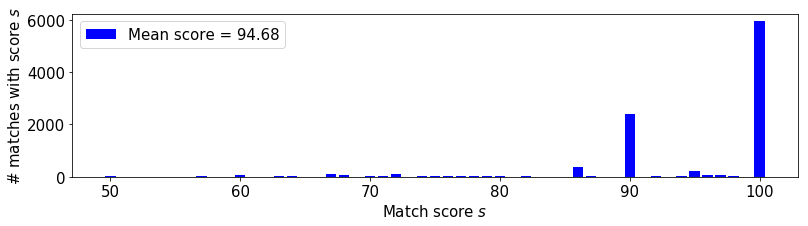

[50, 57, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[22, 18, 71, 3, 5, 23, 19, 2, 105, 84, 6, 14, 12, 102, 6, 27, 24, 14, 22, 12, 24, 40, 15, 7, 1, 3, 360, 20, 2, 3, 2383, 11, 26, 9, 33, 212, 54, 65, 12, 2, 5936]
# matches with score 100: 5936


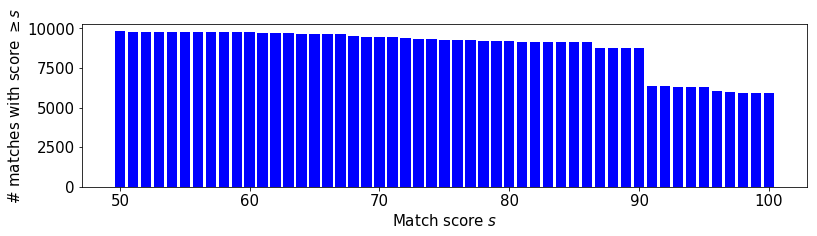

50 9809
57 9787
60 9769
61 9698
62 9695
63 9690
64 9667
66 9648
67 9646
68 9541
69 9457
70 9451
71 9437
72 9425
73 9323
74 9317
75 9290
76 9266
77 9252
78 9230
79 9218
80 9194
82 9154
83 9139
84 9132
85 9131
86 9128
87 8768
88 8748
89 8746
90 8743
91 6360
92 6349
93 6323
94 6314
95 6281
96 6069
97 6015
98 5950
99 5938
100 5936
Cumulative:  [9809, 9787, 9769, 9698, 9695, 9690, 9667, 9648, 9646, 9541, 9457, 9451, 9437, 9425, 9323, 9317, 9290, 9266, 9252, 9230, 9218, 9194, 9154, 9139, 9132, 9131, 9128, 8768, 8748, 8746, 8743, 6360, 6349, 6323, 6314, 6281, 6069, 6015, 5950, 5938, 5936]


In [29]:
################################################################################################
# Plot distribution of scores (x-axis: scores, y-axis: counts)
################################################################################################

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

from collections import Counter
srt_scores = sorted(scores)
cntr = sorted(dict(Counter(scores)).items())
x = [xy[0] for xy in cntr]
y = [xy[1] for xy in cntr]

plt.figure(figsize=(13,3))
plt.bar(x, y, color='b')
plt.legend(['Mean score = {:.2f}'.format(np.mean(scores))])
plt.xlabel('Match score $s$')
plt.ylabel('# matches with score $s$')
plt.show()
print x
print y
print "# matches with score 100:", y[-1]

##########################
# Cumulative distribution
y_cum = []
y.reverse()
for i, yy in enumerate(y): # build cumulative distribution in reverse order
    #print yy
    if i == 0:
        y_cum.append( yy )
    else:
        last = y_cum[-1]
        #print last
        y_cum.append( last + yy )
y_cum.reverse()
#print y_cum
plt.figure(figsize=(13,3))
# Below is to fill the cumulative bar where the scores are not present in the first plot
plt.bar(x + [81, 65, 51,52,53,54,55,56, 58,59], y_cum + [9154, 9648, 9787,9787,9787,9787,9787,9787, 9769,9769], color='b')
plt.xlabel('Match score $s$')
plt.ylabel('# matches with score $\geq s$')
plt.show()
# for a, b in zip(x, y_cum):
#     print a,b

print "Cumulative: ", y_cum
